In [2]:
# Can perfrom statitsticl test and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Hodrick–Prescott filter

- Separate cyclical cycle and trend from data by minimizing a cost function, quarterly data have default of 1600 and annual data has 6.25 default.
- The lambda value selection has been questioned in terms of reliastic representation of data, as well the whole model in later publicatios

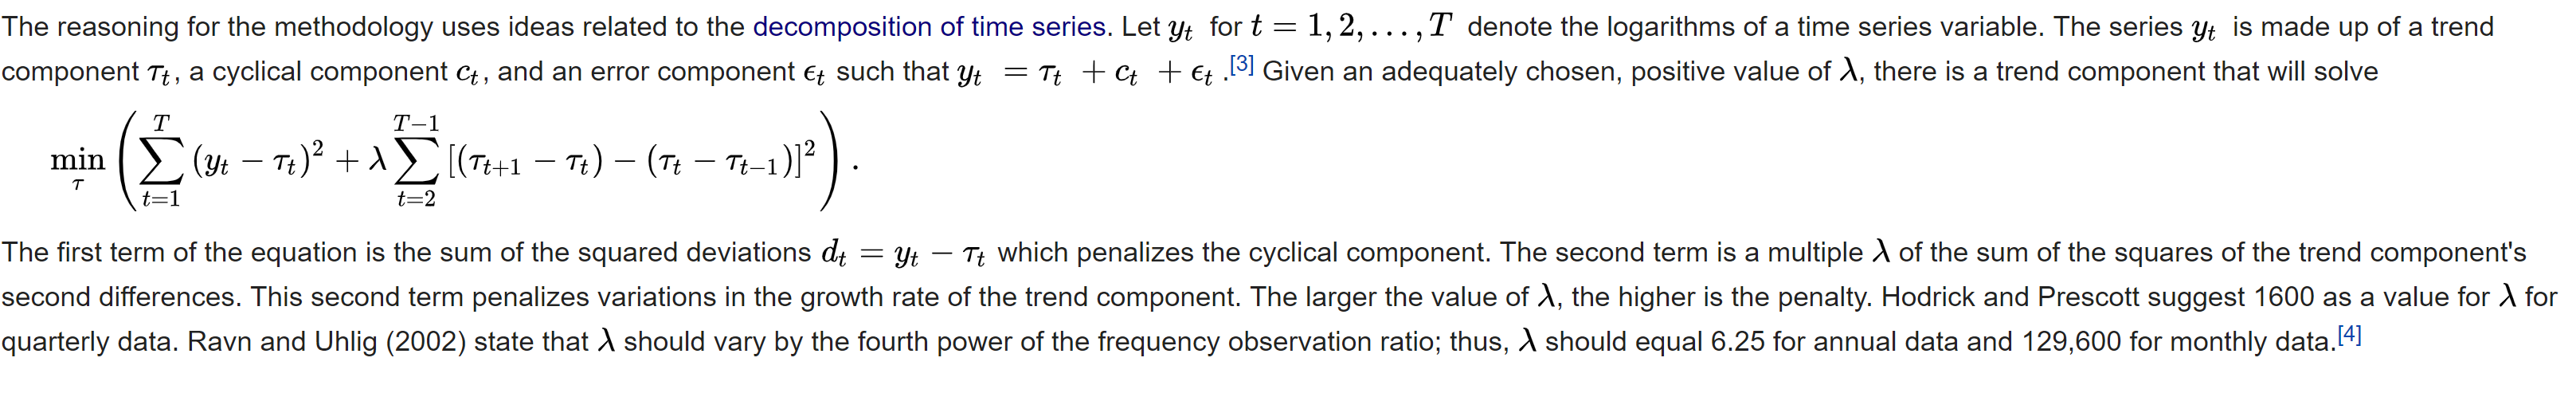

In [1]:
from IPython.display import Image
Image("img/horick_prescott.png")

In [6]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/macrodata.csv", index_col='Unnamed: 0', parse_dates=True)

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


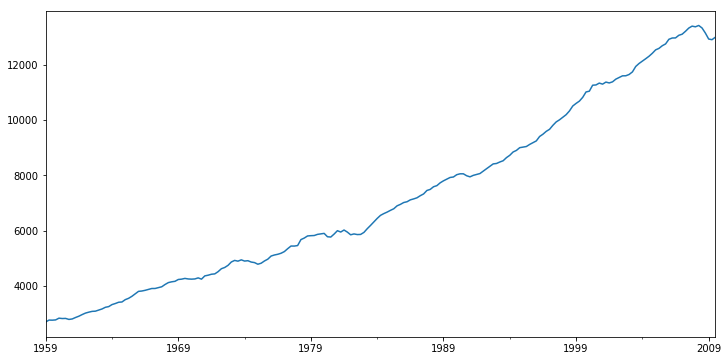

In [8]:
df['realgdp'].plot(figsize=(12,6))

In [9]:
#tsa time series analysis
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)  #quarterly return tuple of cycle and trend

In [14]:
df['gdp_trend'] = gdp_trend
df['gdp_cycle'] = gdp_cycle

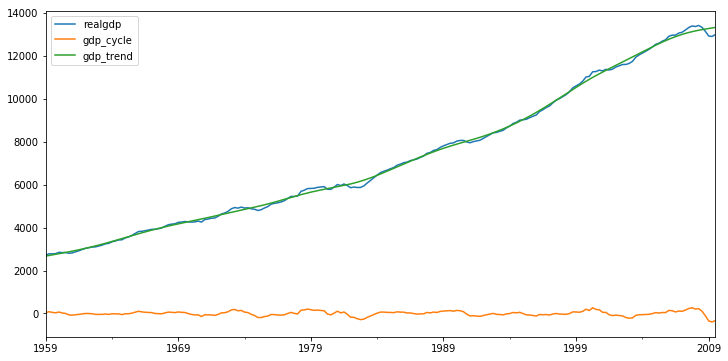

In [15]:
df[['realgdp', 'gdp_cycle', 'gdp_trend']].plot(figsize=(12,6))

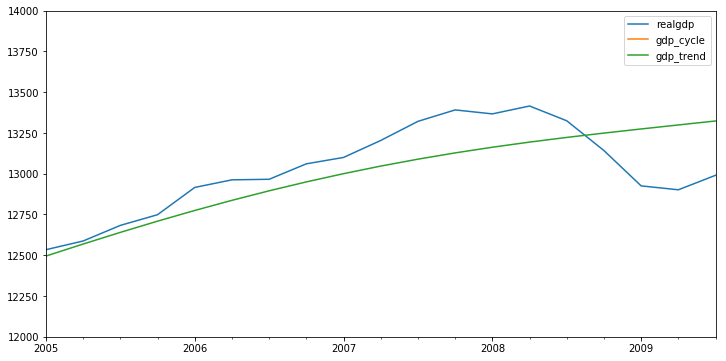

In [18]:
df[['realgdp', 'gdp_cycle', 'gdp_trend']]['2005-01-01':].plot(figsize=(12,6), ylim=[12000,14000])

In [29]:
df[(df['realgdp'] < df['gdp_trend']) & (df['year']>2004)]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_trend,gdp_cycle
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472,-107.269472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706,-349.047706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073,-397.557073
2009-09-30,2009,3,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44,13323.456243,-333.115243


## ETS (Error Trend Seasonality) and decomposition


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [32]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


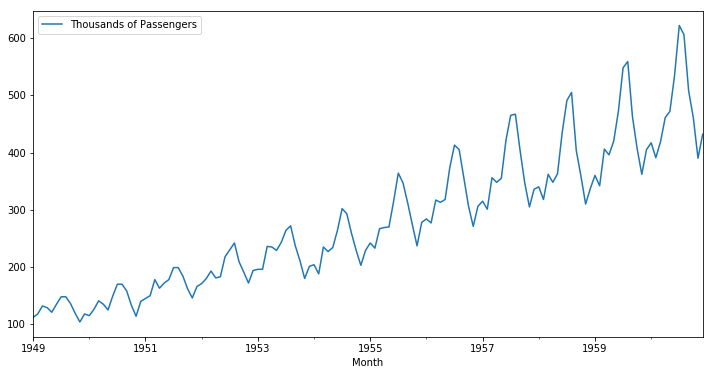

In [34]:
df.plot(figsize=(12,6))

In [36]:
df.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [39]:
result = seasonal_decompose(df['Thousands of Passengers'])

In [40]:
result  #object

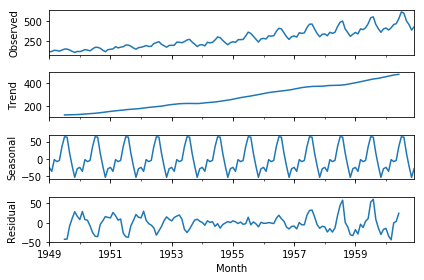

In [55]:
result.plot();   #.trend .seasonal .resid

In [45]:
df['trend_add'] = result.trend
df['seasonal_add'] = result.seasonal
df['residual_add'] = result.resid

In [46]:
result2 = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

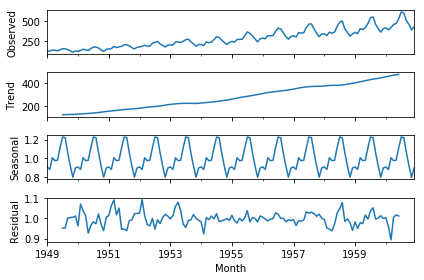

In [54]:
result2.plot();

In [47]:
df['trend_multi'] = result2.trend
df['seasonal_multi'] = result2.seasonal
df['residual_multi'] = result2.resid

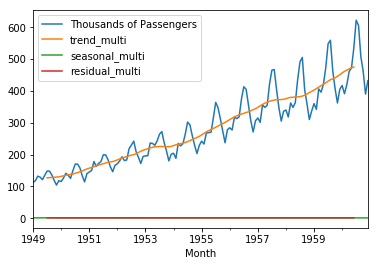

In [49]:
df[['Thousands of Passengers', 'trend_multi', 'seasonal_multi', 'residual_multi']].plot()

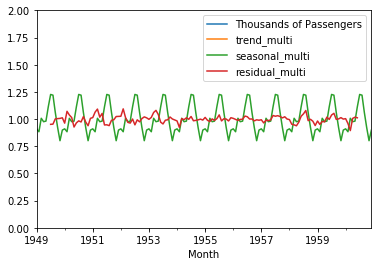

In [53]:
df[['Thousands of Passengers', 'trend_multi', 'seasonal_multi', 'residual_multi']].plot(ylim=[0,2])

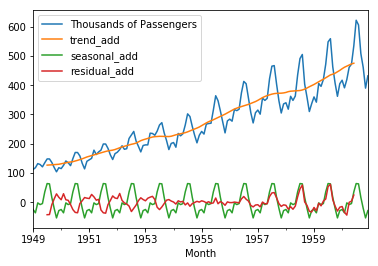

In [50]:
df[['Thousands of Passengers', 'trend_add', 'seasonal_add', 'residual_add']].plot()

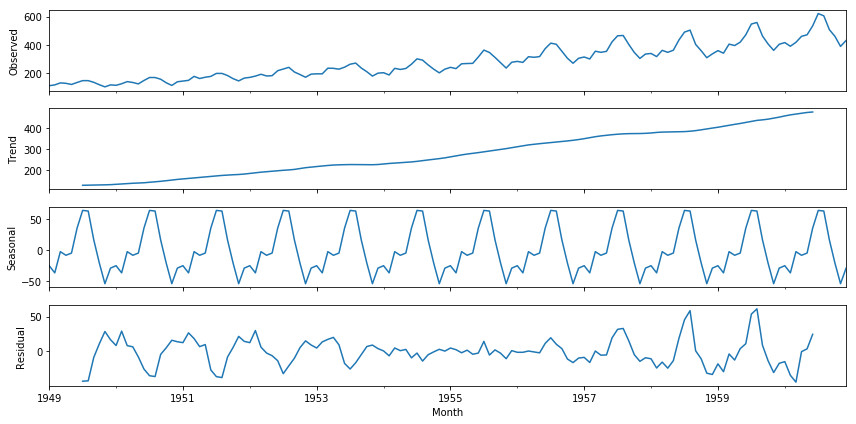

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

result.plot();

In [ ]:
# Weighted moving average y_t+1_hat = alpha * (1-alpha)^0 * y_t + alpha * (1-alpha)^1 * y_t-1 + alpha * (1-alpha)^2 * y_t-2 +..
# y_t+1_hat = alpha * (1-alpha)^0 * y_t + (1-alpha) * (alpha * y_t-1 + alpha * (1-alpha)^1 * y_t-2 +..)
# y_t+1_hat = alpha * (1-alpha)^0 * y_t + (1-alpha) * y_t_hat
# help to reduce past time impact less, alpha small (even weights), alpha large (more recent time)

# exponential smoothing, exponential moving average

In [58]:
df['Thousands of Passengers'].index  #monthly

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [59]:
df['simple_rolling_6month'] = df['Thousands of Passengers'].rolling(6).mean()
df['simple_rolling_12month'] = df['Thousands of Passengers'].rolling(12).mean()

## Exponential weighted moving average, span == N-day exponential movig average

In [60]:
df['exponential_weighted_moving_average_6span'] = df['Thousands of Passengers'].ewm(span=6).mean()
df['exponential_weighted_moving_average_12span'] = df['Thousands of Passengers'].ewm(span=12).mean()

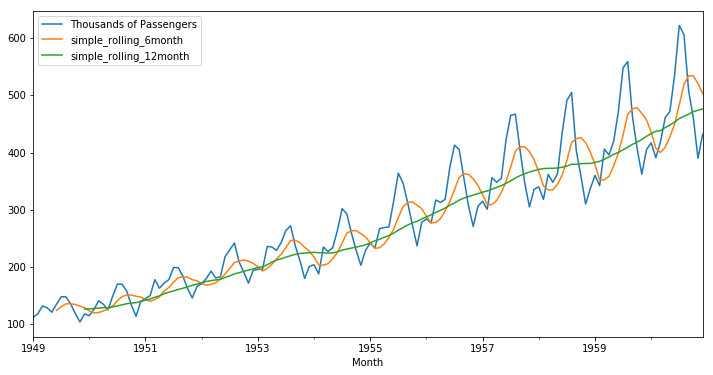

In [61]:
# has lag at the beginning
df[['Thousands of Passengers', 'simple_rolling_6month', 'simple_rolling_12month']].plot(figsize=(12,6))

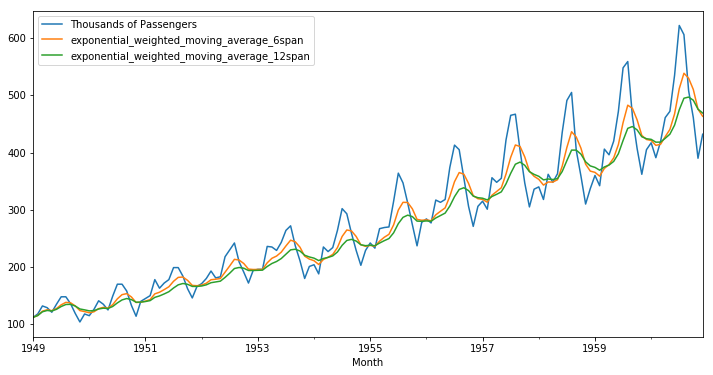

In [62]:
# no lag at the beginning , peaks are aligned
df[['Thousands of Passengers', 'exponential_weighted_moving_average_6span', 'exponential_weighted_moving_average_12span']].plot(figsize=(12,6))

## Holt Winter

In [65]:
df = pd.read_csv("J/UDEMY-TSA-FINAL/Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [66]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [69]:
df.index.freq = 'MS' #calender month beginning

In [70]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [71]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [72]:
span = 12
alpha = 2/(span + 1)

In [73]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [75]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [76]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [78]:
df['simple_smoothing'] = fitted_model.fittedvalues.shift(-1)  #optimize false need to shift back

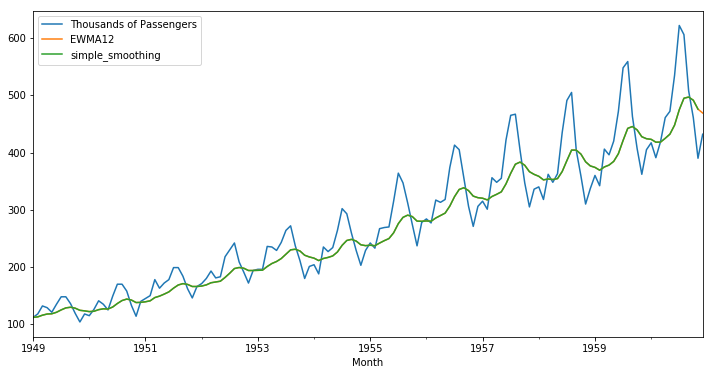

In [81]:
df.plot()

In [82]:
df.tail()

,Thousands of Passengers,EWMA12,simple_smoothing
Month,,,
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952
1960-11-01,390,475.790652,475.790652
1960-12-01,432,469.053629,NaN


In [83]:
fitted_model.predict(start='1961-01-01', end='1963-01-01')   # only level, simple holt

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1961-01-01    469.053629
1961-02-01    469.053629
1961-03-01    469.053629
1961-04-01    469.053629
1961-05-01    469.053629
1961-06-01    469.053629
1961-07-01    469.053629
1961-08-01    469.053629
1961-09-01    469.053629
1961-10-01    469.053629
1961-11-01    469.053629
1961-12-01    469.053629
1962-01-01    469.053629
1962-02-01    469.053629
1962-03-01    469.053629
1962-04-01    469.053629
1962-05-01    469.053629
1962-06-01    469.053629
1962-07-01    469.053629
1962-08-01    469.053629
1962-09-01    469.053629
1962-10-01    469.053629
1962-11-01    469.053629
1962-12-01    469.053629
1963-01-01    469.053629
Freq: MS, dtype: float64

In [84]:
test = fitted_model.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


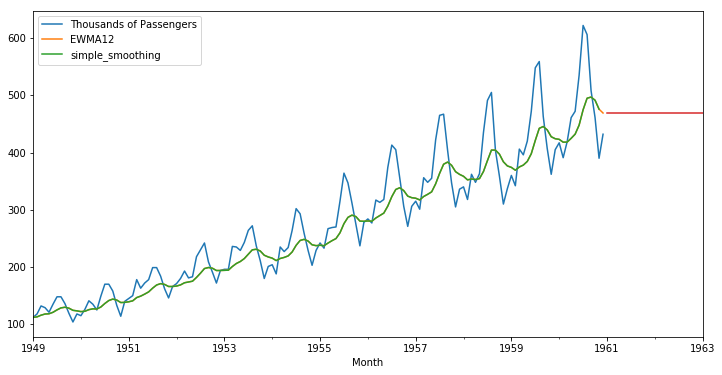

In [87]:
df.plot()
test.plot(label='test')


## Double (trend) and triple (seasonality) smoothing using Exponential smoothing

In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [98]:
model2 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit()

In [99]:
test2 = model2.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [91]:
df['exp_smooth_add_trend'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [101]:
model3 = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='mul',seasonal_periods=12).fit()
test3 = model3.predict(start='1961-01-01', end='1963-01-01')

C:\Users\niava\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [92]:
df['exp_smooth_add_trend_sea_mul'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

In [93]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'simple_smoothing',
       'exp_smooth_add_trend', 'exp_smooth_add_trend_sea_mul'],
      dtype='object')

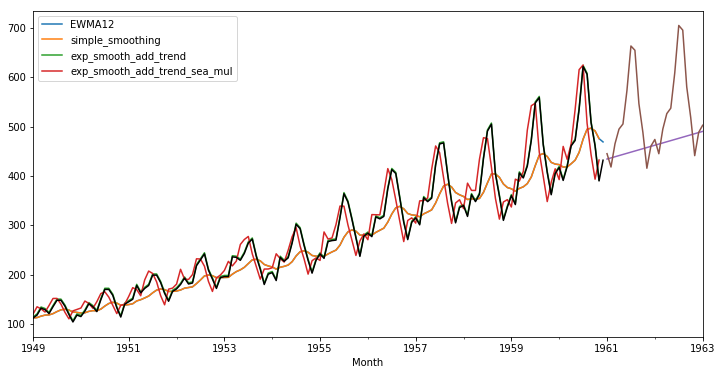

In [103]:
df[['EWMA12', 'simple_smoothing',
       'exp_smooth_add_trend', 'exp_smooth_add_trend_sea_mul']].plot()
df['Thousands of Passengers'].plot(color='black')
test2.plot(label = 'add_trend')
test3.plot(label = 'add_trend_multi_seasonal')